In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fitsio

In [2]:
with fitsio.FITS("data/qsos_no_renorm_noiseless.fits", "r") as h:
    flux = h["FLUX"][:, :10000]#.read()
    ivar = h["IVAR"][:, :10000]#.read()
    w_grid = h["WAVELENGTH"].read()
    z = h["Z"][:10000]#.read()

In [3]:
with fitsio.FITS("data/qsos_no_renorm_noisy.fits", "r") as h:
    flux_noisy = h["FLUX"][:, :10000]#.read()
    ivar = h["IVAR"][:, :10000]#.read()
    w_grid = h["WAVELENGTH"].read()
    z = h["Z"][:10000]#.read()

In [4]:
rng = np.random.default_rng(1009921)

In [5]:
# Low Redshift
idx_1 = np.where(z < 0.1)
choice_1 = rng.choice(idx_1, size=1, replace=False, axis=1)[0]
f_choice_1 = flux[:, choice_1] * (ivar[:, choice_1] != 0)
f_choice_1[f_choice_1 == 0] = np.nan

f_noisy_1 = flux_noisy[:, choice_1] * (ivar[:, choice_1] != 0)
f_noisy_1[f_noisy_1 == 0] = np.nan

# Intermediary Redshift
idx_2 = np.where((z >= 1.4) & (z < 2.1))
choice_2 = rng.choice(idx_2, size=1, replace=False, axis=1)[0]
f_choice_2 = flux[:, choice_2] * (ivar[:, choice_2] != 0)
f_choice_2[f_choice_2 == 0] = np.nan

f_noisy_2 = flux_noisy[:, choice_2] * (ivar[:, choice_2] != 0)
f_noisy_2[f_noisy_2 == 0] = np.nan

# High Redshift
idx_3 = np.where((z >= 3.2))
choice_3 = rng.choice(idx_3, size=1, replace=False, axis=1)[0]
f_choice_3 = flux[:, choice_3] * (ivar[:, choice_3] != 0)
f_choice_3[f_choice_3 == 0] = np.nan

f_noisy_3 = flux_noisy[:, choice_3] * (ivar[:, choice_3] != 0)
f_noisy_3[f_noisy_3 == 0] = np.nan

In [6]:
noise_free = [f_choice_1, f_choice_2, f_choice_3]
noisy = [f_noisy_1, f_noisy_2, f_noisy_3]
redshifts = [z[choice_1][0], z[choice_2][0], z[choice_3][0]]

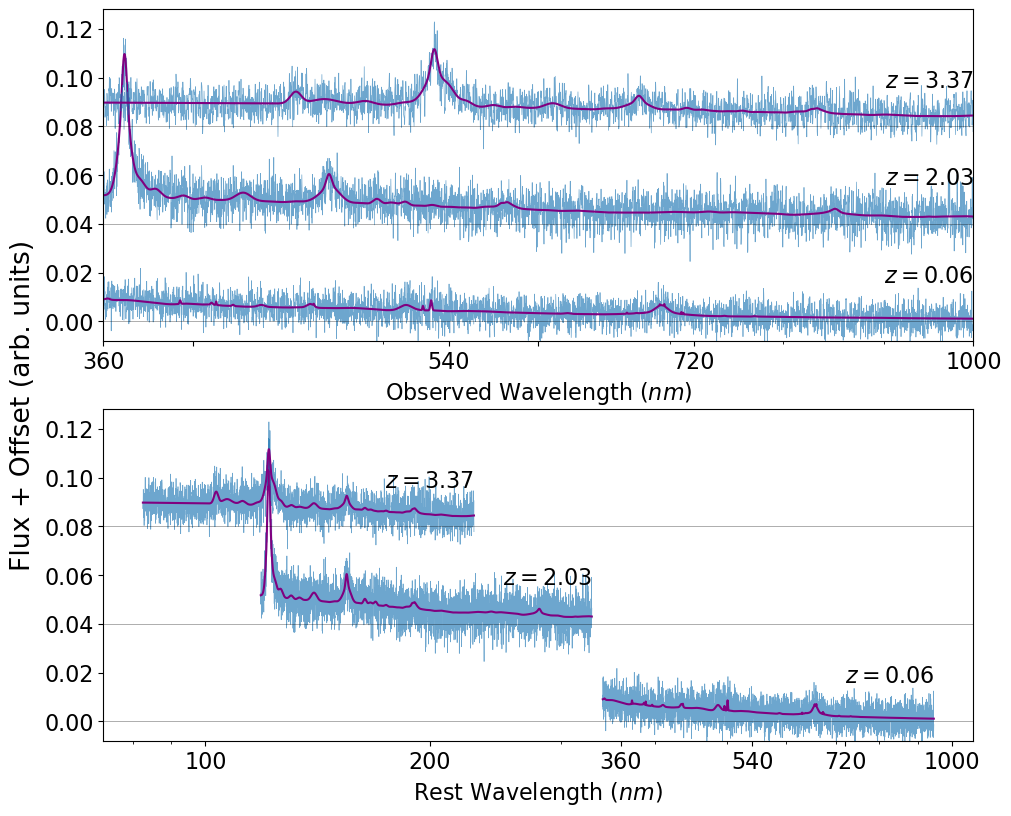

In [7]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(2, 1, figsize=(10, 8), layout="constrained")

scale_factor = 250
offset = 10 / scale_factor
text_offset = 2 / scale_factor

c_noiseless = "purple"
for i in range(len(noise_free)):
    # Noisy
    ax[0].plot(w_grid * (1 + redshifts[i]), noisy[i] + i * offset, c="C0", lw=0.5, alpha=0.65)
    ax[1].plot(w_grid, noisy[i] + i * offset, c="C0", lw=0.5, alpha=0.65)
    
    # Noise-free truth
    ax[0].plot(w_grid * (1 + redshifts[i]), noise_free[i] + i * offset, c=c_noiseless, lw=1.5)
    ax[1].plot(w_grid, noise_free[i] + i * offset, c=c_noiseless, lw=1.5)

    
    # Annotating their redshifts
    this_z = str(np.round(redshifts[i], decimals=2))
    ax[0].text(10000, text_offset * 2 + i * offset, f"$z=${this_z}", ha="right")
    ax[1].text((10000) / (1 + redshifts[i]), text_offset * 2 + i * offset, f"$z=${this_z}", ha="right")


for i in [0, 1]:
    ax[i].set(ylim=(-2 / scale_factor, 32 / scale_factor), xscale="log")
    for y in np.asarray([0, 10, 20]) / scale_factor:
        ax[i].axhline(y=y, alpha=0.45, c="k", lw=0.5)
    
ax[0].set(xlim=(3600, 10000), xlabel="Observed Wavelength ($nm$)")

# Last two clear the ones already there.
x_labels = np.asarray([360, 540, 720, 1000, 400, 600])
ax[0].set_xticks(x_labels*10, np.hstack([x_labels[:-2], ["", ""]]))
    
    
x_labels = np.asarray([100, 200, 360, 540, 720, 1000])
ax[1].set_xticks(x_labels*10, x_labels)
    
fig.supylabel("Flux + Offset (arb. units)")
plt.xlabel("Rest Wavelength ($nm$)")
plt.savefig("plots/qsos.pdf", bbox_inches="tight", dpi=256)